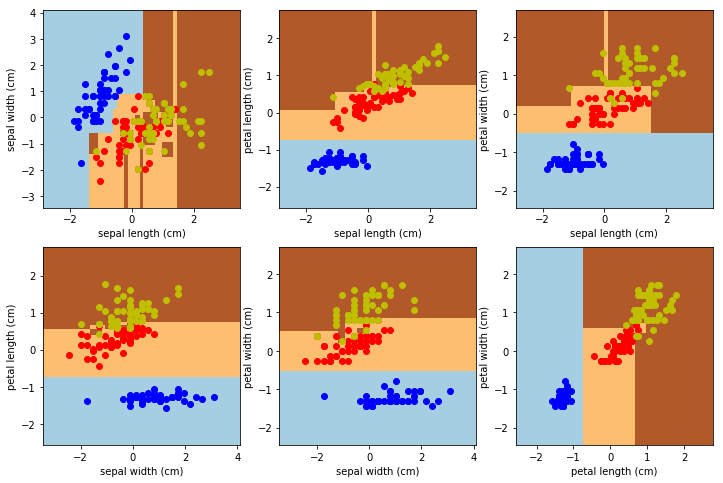

In [25]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
 
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
plt.rcParams["figure.figsize"] = [12, 8]
 
# Load data
iris = load_iris()
 
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
 
    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
 
    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
 
    # Train
    clf = DecisionTreeClassifier().fit(X, y)
 
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis()
 
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis()
 
plt.show()

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

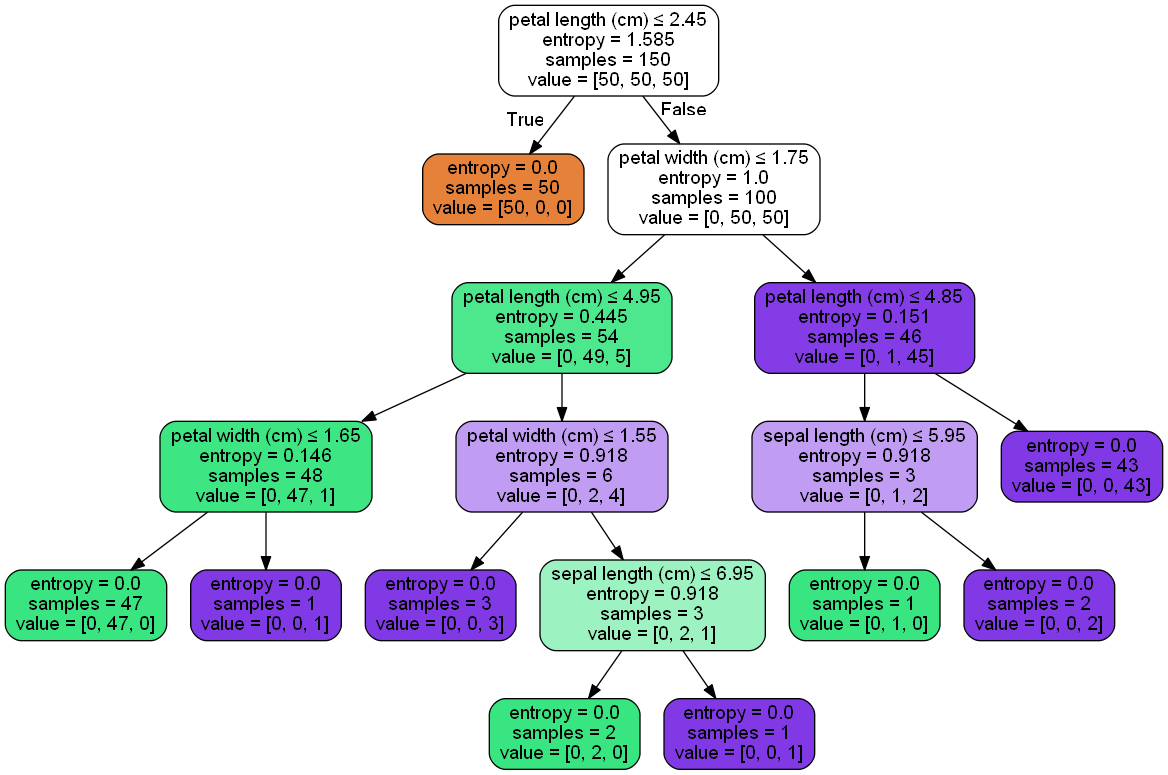

In [31]:
from sklearn.tree import export_graphviz
import pydotplus

iris = load_iris()
X = iris.data



y = iris.target
clf = DecisionTreeClassifier(criterion='entropy').fit(X, y)

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Hyperparâmetros:

**critério**:  define a função para medir a qualidade de uma divisão. O Sklearn suporta os critérios “gini” para o Índice Gini e “entropia” para o ganho de informação. Por padrão, é necessário o valor "gini".


**splitter**: define a estratégia para escolher a divisão em cada nó. Suporta o "melhor" valor para escolher a melhor divisão e "aleatório" para escolher a melhor divisão aleatória. Por padrão, é preciso o melhor valor.


**max_features**:  define o número de recursos a serem considerados ao procurar a melhor divisão. Podemos inserir valores inteiros, flutuantes, string e Nenhum.
Se um número inteiro for inserido, ele considera esse valor como máximo em cada divisão. Se o valor float for obtido, ele mostrará a porcentagem de recursos em cada divisão.


Se "auto" ou "sqrt" é tomado, então max_features = sqrt (n_features).


Se “log2” é tomado, então max_features = log2 (n_features).


Se "none", então max_features = n_features. Por padrão, leva o valor "None".


**max_depth**:  O parâmetro max_depth indica a profundidade máxima da árvore. Pode ter qualquer valor inteiro ou nenhum. Se Nenhum, os nós serão expandidos até que todas as folhas fiquem puras ou até que todas as folhas contenham menos de amostras de min_samples_split. Por padrão, leva o valor "Nenhum".


**min_samples_split**:  Isso informa acima do mínimo não. de amostras reqd. para dividir um nó interno. Se um valor inteiro for obtido, considere min_samples_split como o mínimo no. Se float, então mostra porcentagem. Por padrão, leva o valor “2”.


**min_samples_leaf**:  O número mínimo de amostras necessárias para estar em um nó folha. Se um valor inteiro for obtido, considere min_samples_leaf como o mínimo no. Se float, então mostra porcentagem. Por padrão, leva o valor "1".


**max_leaf_nodes**: Define o número máximo de nós de folha possíveis. Se Nenhum, então, é necessário um número ilimitado de nós folha. Por padrão, leva o valor "Nenhum".


**min_impurity_split**: Define o limite para o crescimento antecipado da árvore. Um nó irá se dividir se a sua impureza estiver acima do limite, caso contrário, será uma folha.



O índice de Gini e o ganho de informações desses dois métodos são usados ​​para selecionar os n atributos do conjunto de dados cujo atributo seria colocado no nó raiz ou no nó interno. 

|

**Indice de Gini**

- O Índice de Gini é uma métrica para medir com que frequência um elemento escolhido aleatoriamente seria identificado incorretamente.

- Isso significa que um atributo com menor índice de gini deve ser preferido.

- O Sklearn suporta o critério “gini” para o índice Gini e, por padrão, recebe o valor “gini”.

**Entropia**

- Entropia é a medida da incerteza de uma variável aleatória, ela caracteriza a impureza de uma coleção arbitrária de exemplos. Quanto maior a entropia, mais o conteúdo da informação.

$\log_2{p(x)}$
<img src='img\entropia.png'>


**Ganho de Informação**

- A entropia geralmente muda quando usamos um nó em uma árvore de decisão para particionar as instâncias de treinamento em subconjuntos menores. O ganho de informação é uma medida dessa mudança na entropia.

- O Sklearn suporta os critérios de “entropia” para o ganho de informação e, se quisermos usar o método de ganho de informação no sklearn, temos que mencioná-lo explicitamente.

